In [1]:
from regression import (logreg, utils)
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
X_train, X_val, y_train, y_val = utils.loadDataset(
    features=[
        'Penicillin V Potassium 500 MG',
        'Computed tomography of chest and abdomen',
        'Plain chest X-ray (procedure)',
        'Low Density Lipoprotein Cholesterol',
        'Creatinine',
        'AGE_DIAGNOSIS',
    ],
    split_percent=0.8,
    split_seed=42
)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

In [3]:
from sklearn.linear_model import LogisticRegression

sklearn_reggressor = LogisticRegression(
    penalty='l2', solver='liblinear',
    dual=False,
    random_state=42
).fit(X_train, y_train)

sklearn_accuracy = sklearn_reggressor.score(X_val, y_val)
print(f"Scikit-Learn Regressor Accuracy: {sklearn_accuracy}")

Scikit-Learn Regressor Accuracy: 0.8725


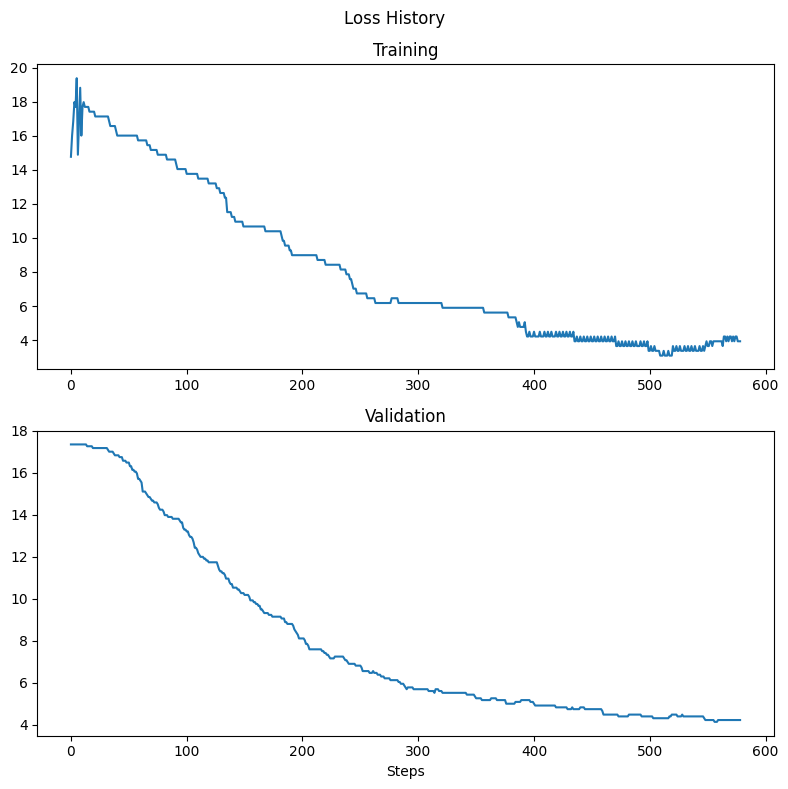

In [4]:
# log_model = logreg.LogisticRegressor(num_feats=6, learning_rate=0.00001, tol=0.01, max_iter=10, batch_size=10)

log_model = logreg.LogisticRegressor(
    num_feats=6, 
    learning_rate=0.01, 
    tol=0.0002, 
    max_iter=2500, 
    batch_size=128,
)

log_model.train_model(X_train, y_train, X_val, y_val)
log_model.plot_loss_history()